In [3]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.metrics import classification_report

In [ ]:
recipes = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
recipes['ct_prod_label'] = pd.cut(recipes['ct_prod'], bins=[0, 2, 5, 10, np.inf], labels=['malo', 'bueno', 'muy bueno', 'excelente'])


In [ ]:
columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']

In [ ]:
X = recipes[columnas_SVM]
y = recipes['ct_prod_label']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
sns.lmplot(x='ct_k511ha', y='ct_k510ha', data=recipes, hue='ct_prod_label', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [ ]:
parameters = {'kernel': ['rbf', 'linear', 'poly'],
              'C': [0.1, 1, 10]}

clf = GridSearchCV(svm.SVC(), parameters, cv=15, n_jobs=-1, verbose=3)
clf.fit(X, y_encoded)

In [ ]:
best_score = clf.best_score_
best_params = clf.best_params_
best_model = clf.best_estimator_


svc_best = svm.SVC(**best_params)
svc_best.fit(X, y_encoded)
y_pred = svc_best.predict(X)

classification_rep = classification_report(y_encoded, y_pred)

print("Mejor puntaje obtenido:", best_score)
print("Mejores hiperparámetros encontrados:")
print(best_params)
print(classification_rep)

# 0=malo,1=bueno,2=muy bueno,3=excelente

In [ ]:
# Obtener los coeficientes y el intercepto del modelo con los mejores hiperparámetros
w = svc_best.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(10, 20)
yy = a * xx - (svc_best.intercept_[0]) / w[1]

# Plotear el hiperplano separador
plt.plot(xx, yy, linewidth=2, color='black')
plt.show()

In [ ]:
sns.scatterplot(x='ct_prod', y='ct_k510ha', data=recipes, hue='ct_prod_label', palette='Set1')
plt.plot(xx, yy, linewidth=2, color='black')
plt.show()

In [ ]:
# Obtener los vectores de soporte del modelo
vectores_soporte = svc_best.support_vectors_

# Imprimir los vectores de soporte
print("Vectores de soporte:")
print(vectores_soporte)


In [ ]:
# Suponiendo que tienes los datos originales en el DataFrame 'recipes'

# Obtener las características de los datos originales
X_originales = recipes[columnas_SVM]

# Realizar la predicción
y_pred_originales = svc_best.predict(X_originales)

# Decodificar las etiquetas predichas (si deseas obtener las etiquetas originales)
y_pred_decodificados = label_encoder.inverse_transform(y_pred_originales)

# Imprimir las predicciones
print("Predicciones:")
print(y_pred_decodificados)


# Prueba 2

In [4]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Loading and exploring our dataset
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df['ct_prod_label'] = pd.cut(df['ct_prod'], bins=[0, 2, 5, 10, np.inf], labels=['malo', 'bueno', 'muy bueno', 'excelente'])

print(df.head())

   Index     _1      Identificador  year  rc_clacul  ct_prepa_suelo  \
0    168  12678  12085002062560003  2018        507               1   
1    172  12683  12085002062560004  2018        507               1   
2    171  12682  12085002062560004  2018        507               1   
3    170  12681  12085002062560004  2018        507               1   
4    169  12680  12085002062560004  2018        507               1   

   ct_k510ha  ct_k511ha  ct_afecta_prod  ct_riego  ...  ct_color_her_pq  \
0     0.0706     0.0706               2         1  ...                4   
1     0.5000     0.5000               2         1  ...                3   
2     0.5000     0.5000               2         1  ...                3   
3     0.5000     0.5000               2         2  ...                3   
4     0.5000     0.5000               3         2  ...                3   

   pq_ins  ct_color_ins_pq  pq_fun  ct_color_fun_pq  su_plaguicidas   ct_prod  \
0     0.5                1     0.5       

In [6]:
columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']
X = df[columnas_SVM]
y = df['ct_prod_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [7]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
predictions = clf.predict(X_test)
print(predictions[:8])

['excelente' 'excelente' 'muy bueno' 'bueno' 'malo' 'bueno' 'bueno' 'malo']


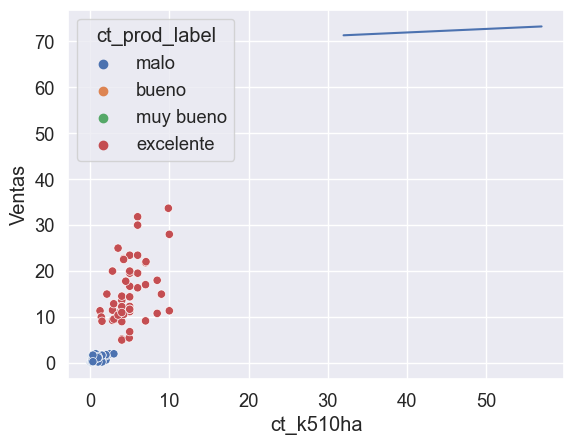

In [9]:
# Rerunning the algorithm with a binary classifier
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df['ct_prod_label'] = pd.cut(df['ct_prod'], bins=[0, 2, 5, 10, np.inf], labels=['malo', 'bueno', 'muy bueno', 'excelente'])
df = df[df['ct_prod_label'] != 'muy bueno'] 
df = df[df['ct_prod_label'] != 'bueno']  # This limits us to two classes

columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']
X = df[columnas_SVM]
y = df['ct_prod_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='ct_k510ha', y='Ventas', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()

In [10]:
# Plotting our penguin species features
pairplot(df, hue='ct_prod_label')
plt.show()

# Prueba 3

In [ ]:
from seaborn import load_dataset
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Load the data and create training and testing data
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df['ct_prod_label'] = pd.cut(df['ct_prod'], bins=[0, 2, 5, 10, np.inf], labels=['malo', 'bueno', 'muy bueno', 'excelente'])

columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']
X = df[columnas_SVM]
y = df['ct_prod_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [ ]:
# Create a transformer object
column_transformer = make_column_transformer(
    
    (StandardScaler(), ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']),
    remainder='passthrough')

In [ ]:
# Transform the training features
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())


In [ ]:
# Building and fit the classifier
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(X_train, y_train)

In [ ]:
# Transform the training data
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

In [ ]:
predictions = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

In [ ]:
data = {
    'ct_prepa_suelo': [1],
    'ct_k510ha': [0.0706],
    'ct_k511ha': [0.0706],
    'ct_afecta_prod': [2],
    'ct_riego': [1],
    'su_fertilizada': [0.0706],
    'ct_fqui': [1],
    'ct_fqui_npk': [1.1023],
    'ct_pqui': [1],
    'su_plaguicidas': [0.0706],
    'ct_prod': [0.2727],
    'Ventas': [0.181818]
}

data = pd.DataFrame(data)
df_transformed = column_transformer.transform(data)
df_transformed = pd.DataFrame(df_transformed, columns=column_transformer.get_feature_names_out())
predicted_species = clf.predict(df_transformed)
print("La categoria es: ",predicted_species)